# Линейная алгебра. Лабораторная работа 1, зима 2022, пилотный поток

В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` - основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` - графическая библиотека

Подключить их можно следующим образом:

In [38]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` - с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных &mdash; это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [39]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]`, и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`.

*Умножение матриц* производится с помощью оператора `np.dot()`. Есть два варианта написания: `A.dot(B)` и `np.dot(A, B)`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` &mdash; это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` &mdash; это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` &mdash; это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)`.

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

**И всё-таки задание**

В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2 и 3 строки и 1 и 2 столбца; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

А сейчас мы в качестве примера создадим единичную матрицу:

In [40]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [41]:
Z = np.zeros(shape = (3, 4))
Z

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [42]:
nums = np.array([1, 2, 3, 4, 5])
A = np.diag(nums)
A

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

In [43]:
A.trace()

15

In [44]:
sla.inv(A)

array([[ 1.        ,  0.        ,  0.        ,  0.        , -0.        ],
       [ 0.        ,  0.5       ,  0.        ,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.33333333,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.25      , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.2       ]])

In [45]:
X = np.random.rand(4, 5)
X

array([[0.2556805 , 0.31606494, 0.4366854 , 0.34460951, 0.47048679],
       [0.05291068, 0.52654319, 0.45098431, 0.14284554, 0.16414665],
       [0.51984334, 0.67603855, 0.62785585, 0.91987242, 0.35973212],
       [0.11695247, 0.60018009, 0.53736392, 0.86790222, 0.43400387]])

In [46]:
np.linalg.det(X[1:3, 0:2])

-0.23795031106636313

In [47]:
np.dot(X, X.T)

array([[0.69607724, 0.5033431 , 1.10700737, 0.95753778],
       [0.5033431 , 0.53078309, 0.85707039, 0.75976771],
       [1.10700737, 0.85707039, 2.09704065, 1.75841337],
       [0.95753778, 0.75976771, 1.75841337, 1.60426763]])

## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [48]:
def my_det(x):
    if x.shape[0] != x.shape[1]:
        raise ValueError
    else:
        X = np.array(x, dtype = np.float64)
        c = 0
        det = 1.0
        width = X.shape[0]
        while c < width:
            if X[c][c] == 0.0:
                flag = 1
                for j in range(c + 1, width):
                    if X[j][c] != 0.0:
                        sw1, sw2 = X[c].copy(), X[j].copy()
                        X[c], X[j] = sw2, sw1
                        det *= -1.0
                        flag = 0
                if flag:
                    return 0.0
            dell = 1 / X[c][c]
            X[c] *= dell
            det /= dell
            for j in range(c + 1, X.shape[0]):
                    X[j] -= X[c] * X[j][c]
            c += 1
    return det

Простая проверка:

In [49]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(my_det(X))

-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $8\times8$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [50]:
# Запустите этот блок кода
for _ in range(10):
    X = np.random.rand(8,8)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно. 

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

10.6 µs ± 89.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
180 µs ± 632 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
102 µs ± 92.3 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
15.5 ms ± 15.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.9 ms ± 282 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


/var/folders/kq/qdhn7zcn0719x424cj0p4f140000gn/T/ipykernel_1981/400099992.py:22: RuntimeWarning: overflow encountered in double_scalars
  det /= dell


2.02 s ± 1.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


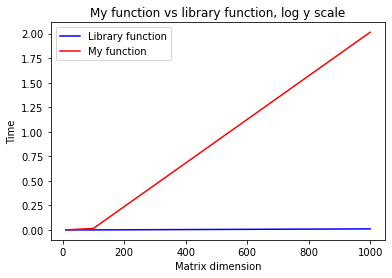

In [51]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

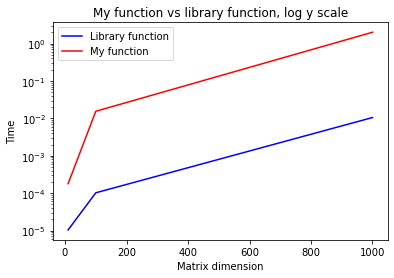

In [52]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [53]:
a = np.array([[1, 0], [10**20, 1]])
b = np.array(([10**(-20), 1], [0, 1-10**(20)]))

c = np.array([[1., 0.], [(10.)**20, 1.]])
d = np.array([[10.**-20, 1.], [0., 1.-10**20]])
print(np.dot(a, b))
print(np.dot(c, d))

[[1e-20 1]
 [1.0 1]]
[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


И какой из них правильный?

---
**Напишите здесь свой ответ**

$$
\begin{pmatrix}
10^{20} & 1\\
1 & 1
\end{pmatrix}
$$
Мы вручную можем проверить, что правильный ответ - первая матрица. Ошибка во второй же возникает потому, что Python плохо работает с числами с плавающей запятой.

Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [54]:
def my_pascal(dim):
    P = np.zeros((dim, dim))
    for i in range(dim):
        P[0, i] = 1
        P[i, 0] = 1
    for i in range(1, dim):
        for j in range(1, dim):
            P[i, j] = P[i, j-1] + P[i-1, j]
    return P
my_pascal(5)

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  2.,  3.,  4.,  5.],
       [ 1.,  3.,  6., 10., 15.],
       [ 1.,  4., 10., 20., 35.],
       [ 1.,  5., 15., 35., 70.]])

Чему равен её определитель? Обязательно объясните свой ответ.

----
**Ваше решение**

С помошью элементарных преобразований 1 вида мы можем привести данную матрицу в верхнетреугольной (или нижне-) с 1 на диагонали. Эти преобразования не меняют её определителя, значит определитель будет равен 1.

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [55]:
P = my_pascal(30)
sla.det(P)

-7.109158315046981e+49

Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично, если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

Не забудьте написать тесты, которые будут проверять корректность ваших функций.

**Задание 4.1** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение и сумму квадратов диагональных элементов квадратной матрицы `A`.

In [56]:
A = np.array([[1, 0, 0], [0, 2, 0], [0, 0, 3]])
B = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 3]])

In [57]:
def prod_and_sq_sum(A):
    arr = np.diagonal(A, 0)
    pr = np.prod(arr)
    arr2 = arr * arr
    sumsq = sum(arr2)
    return pr, sumsq
print(*prod_and_sq_sum(A))


6 14


**Задание 4.2** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы. Напишите функцию `f(A, B, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,m)}a_ib_i^T$$

In [58]:
def f(A, B, k):
    m, n = A.shape[0], A.shape[0]
    return np.sum(np.matmul(A.T.reshape(n, m, 1), B.T.reshape(n, 1, m)).reshape(n, m, m)[:min(k, m)], axis=0)
print(f(A, B, 3))

[[1 0 0]
 [0 2 0]
 [0 0 9]]


**Задание 4.3** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [59]:
def get_diag(A, B):
    return np.einsum("ij,ji->i", A, B)
get_diag(A, B)

array([1, 2, 9])

## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

**Внимание!** При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Решения, в которых в какой-либо момент работа происходит не с комплексным числом как таковым, а с парой вещественных, будут оцениваться нулём баллов. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его на `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

Ваша функция должна работать для любой точки корректно.

**Задание 5.2** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка). Ваша функция должна работать для любой точки корректно.

**Задание 5.3** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)). Ваша функция должна работать для любой точки корректно

In [60]:
z = 0.5 + 1.2 * 1j
a = 1

In [61]:
def shrink_rotate(x, a, coef=1., angle=0.):
    v = coef * (x - a)
    return a + v * (np.cos(angle) + 1j * np.sin(angle))
    
def shrink_rotate_conj(x, a, coef=1., angle=0.):
    v = coef * (x - a)
    v1 = a + v * (np.cos(angle) + 1j * np.sin(angle))
    return np.conj(v1)
    
def geometric_inverse(x, a, r):
    return a + r ** 2 / (x - a).conjugate()

In [62]:
print(shrink_rotate(z, a, coef = 5, angle = 2))
print(shrink_rotate_conj(z, a, coef = 5, angle = 2))
print(geometric_inverse(z, a, 2))


(-3.4154174695862336-4.770124586347059j)
(-3.4154174695862336+4.770124586347059j)
(-0.18343195266272194+2.840236686390533j)


**Задание 5.4** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

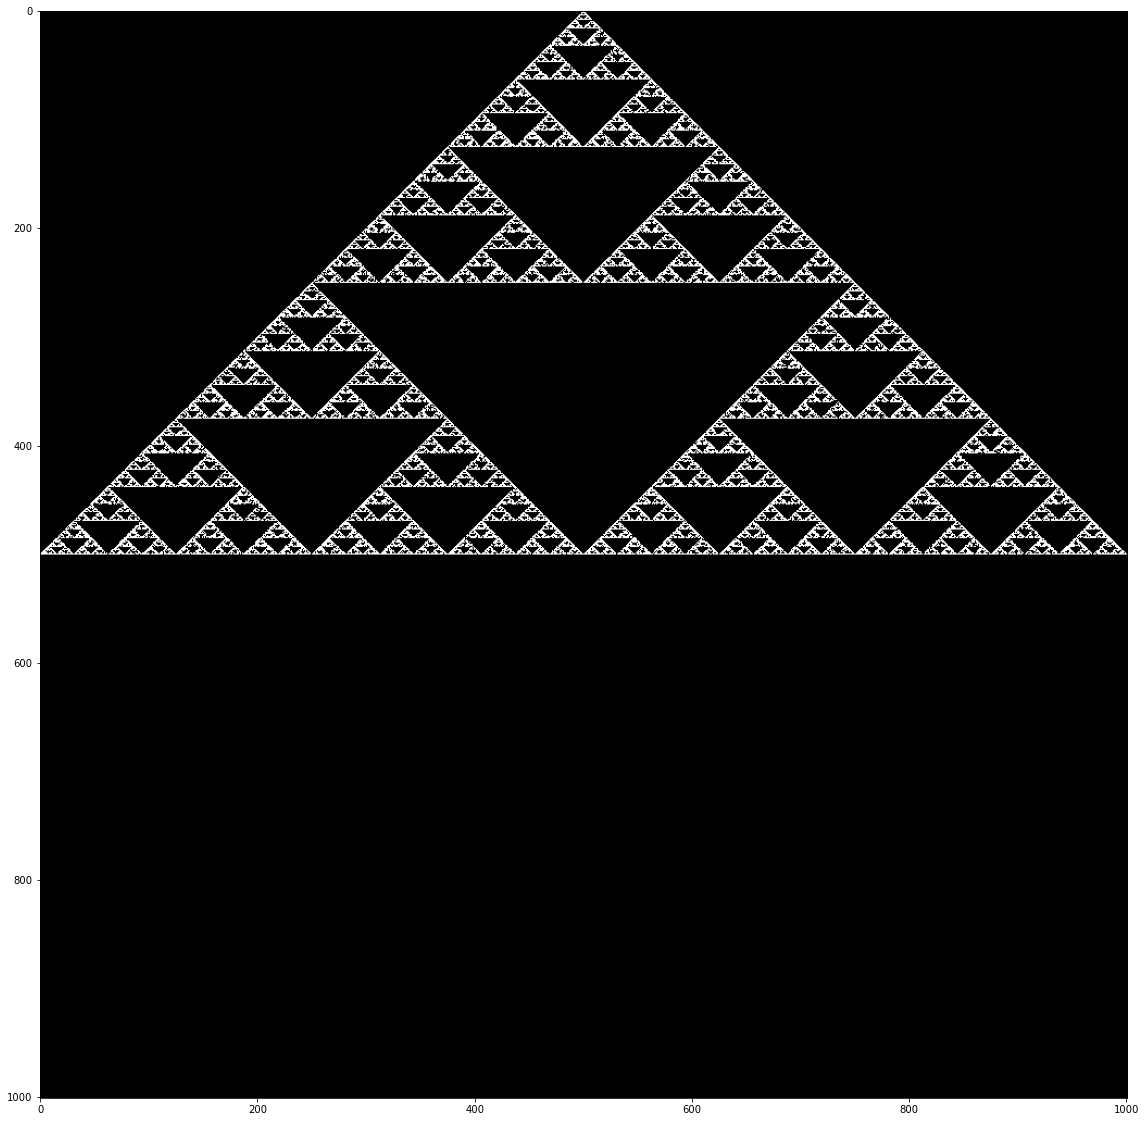

In [63]:
z = 0.5 + 0.*1j
max_iter = 100000
a = np.zeros((1001, 1001))
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 9:
        x, y = int(np.real(z) * 500 +500), 1000 - int(z.imag * 500+500)
        a[y, x] = 1
plt.figure(figsize=(20, 20))
plt.imshow(a, cmap='gray')

**Задание 5.5 (со звёздочкой)** Попробуйте объяснить, почему получается именно эта фигура.

---
Ваше объяснение

Мы фактически реализуем Chaos Game - один из способов построения трегольника Серпинского.

**Задание 5.6** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

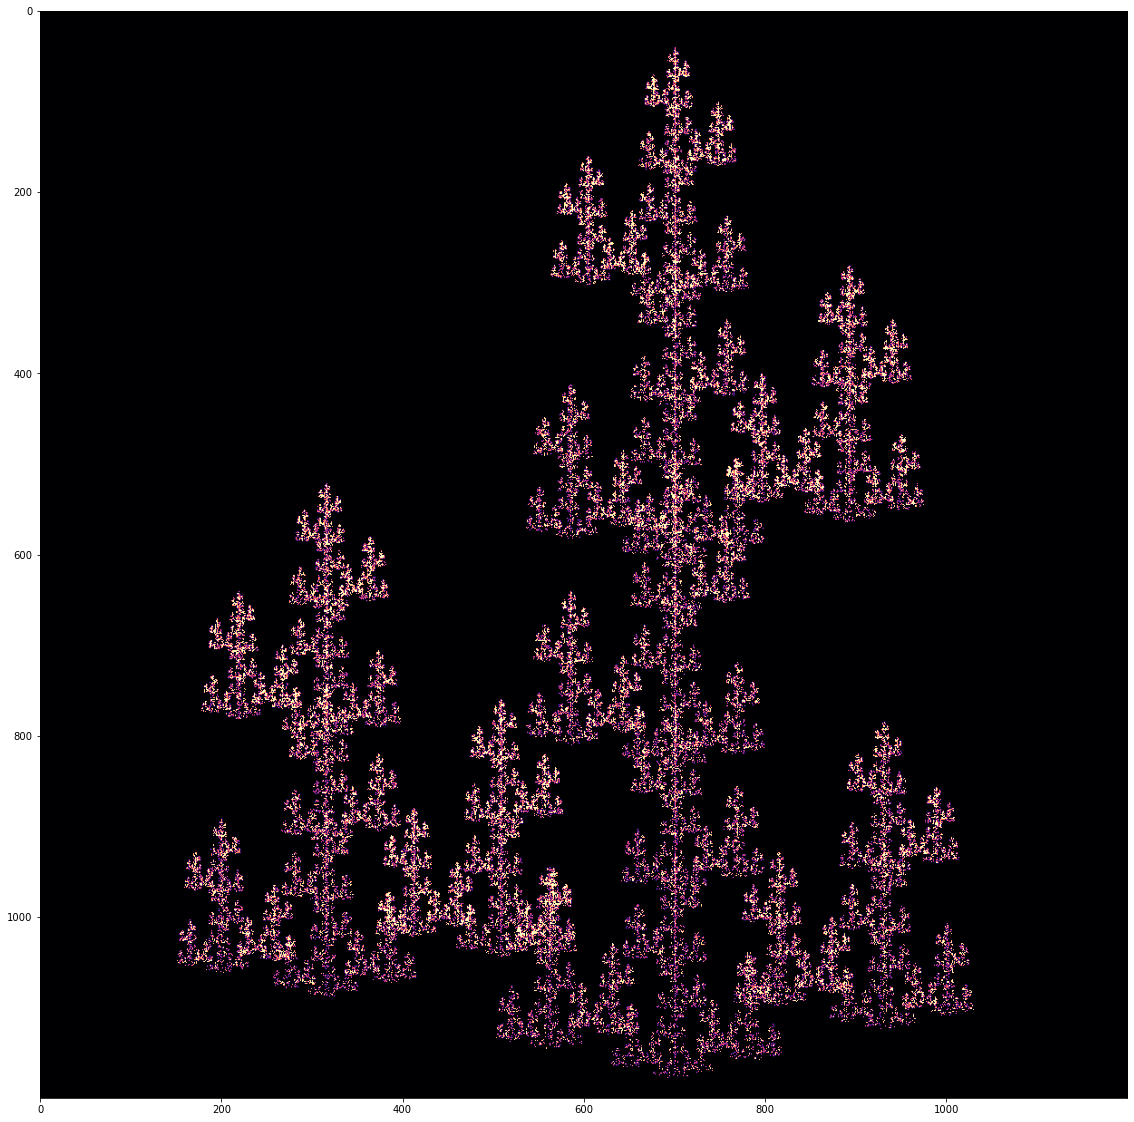

In [64]:
z = 0.5 + 0.*1j
max_iter = 100000
a = np.zeros((1200, 1200))
funcs = [
    (lambda t: shrink_rotate_conj(t, 0.5 + 1.1*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate_conj(t, 0.8 + 0.*1j, coef=0.6, angle=0.)),
    (lambda t: shrink_rotate_conj(t, -1.1 + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 9:
        x, y = int(z.real * 600) + 700, int(z.imag * 700) + 700
        a[x, y] = 1
plt.figure(figsize=(20, 20))
plt.imshow(a, cmap='magma')


Это типа коралл, вот.

## Часть 6. Функции от матриц

Пусть $A$ -- некоторая квадратная матрица. В некоторых приложениях возникает необходимость вычислить какую-нибудь сложную функцию от матрицы. Например, экспоненту или синус. Это можно делать с помощью разложения в ряд, но мы пойдем другим путем. В этой задаче мы продемонстрируем другой метод:

1) Посчитаем какой-нибудь аннулирующий многочлен для матрицы $A$. Пусть это будет $f(x)$.

2) Разложим многочлен $f$ на множители следующим образом $f(x) = (x-\lambda_1)^{k_1}\ldots (x-\lambda_r)^{k_r}$.

3) Пусть $\phi$ -- гладкая функция, значение которой мы хотим посчитать на матрице $A$. Найдем какой-нибудь многочлен $g_\phi$ степени меньше, чем степень $f$ со следующими свойствами: $g_\phi(\lambda_i)^{(d)} = \phi^{(d)}(\lambda_i)$ для всех $0 \leqslant d < k_i$. То есть во всех корнях $f$ все производные $g_\phi$ до кратности корня должны совпасть с производными $\phi$.

4) Утверждается, что $\phi(A) = g_\phi(A)$ (и в частности не зависит от выбора многочлена $g_\phi$ с указанными свойствами).

**А теперь задание**

Каждая группа будет работать со своей матрицей:

- у группы 221:

`A = np.array([[-1,1,2,-2],[-5,4,3,-4],[0,0,2,-1],[1,0,-1,1]])`

- у группы 222:

`A = np.array([[-3,5,-5,-7],[-10,12,-9,-15],[5,-2,-2,1],[-9,7,-2,-7]])`

- у группы 223:

`A = np.array([[6,-3,-5,-3],[-7,4,6,4],[9,-3,-6,-5],[-3,-2,0,2]])`

- у группы 224:

`A = np.array([[-6,-4,3,6],[1,-3,0,-1],[-1,-1,-5,0],[1,1,1,-4]])`

 

Посчитайте указанным способом:
 

1) $B = e^A$.
 
2) $S = \sin A$.

3) $T = \cos A$.

4) Проверьте равенство $S^2 + T^2 = E$, то есть $\sin^2 A + \cos^2 A = E$.

5) $\ln (B)$ и проверьте, что полученная матрица совпадает с $A$.

Заметим, что для взятия производных и нахождения корней многочлена не обязательно использовать программы. 

1) Давайте найдём характеристический многочлен (по теореме Гамильтона-Кэли он является аннулирующим для матрицы А)

In [65]:
A = np.array([[-6.,-4.,3.,6.],[1.,-3.,0.,-1.],[-1.,-1.,-5.,0.],[1.,1.,1.,-4.]])
koefs = np.poly(A)
roots = np.roots(koefs)
print(*roots)

-5.000000559052872 -4.999999440946683 -4.0000004417950406 -3.999999558205428


С учётом погрешности вычислений делаем вывод, что у хар. многочлена корни: -5, -5, -4, -4. Он выглядит так $$f(x) = (x + 4)^2(x + 5)^2 = 3x^4 + 54x^3 + 363x^2 + 1080x + 1200 $$

Теперь нужно взять некоторый многочлен g(x) степени меньшей чем f(x): $$ g(x) = ax^3 + bx^2 + cx + d $$

Максимальная кратность обоих корней - 2. Поэтому нужно взять две производных (нулевую и первую).
$$g(x) = ax^3 + bx^2 + cx + d \\
g'(x) = 3ax^2 + 2bx + c $$
Мы получим 4 системы уравнений при подставление в каждую производную -4 и -5:
$$
\begin{equation}
\left\{ \begin{aligned} 
  g(-5) = -125a + 25b - 5c + d \\
  g'(-5) = 75a - 10b + c = 0 \\
  g(-4) = -64a + 16b - 4c + d = 0 \\
  g'(-4) = 48a - 8b + c = 0
\end{aligned} \right.
\end{equation}
$$

Теперь найдём решение это системы и подставим коэф-ты в многочлен g(x):

In [66]:
from numpy.linalg import matrix_power

In [67]:
#1
g = np.array([[-125., 25., -5., 1.], [75., -10., 1., 0.], [-64., 16., -4., 1.], [48., -8., 1., 0.]]) 
row = np.array([[np.e ** (-5.)], [np.e ** (-5.)], [np.e ** (-4.)], [np.e ** (-4.)]])
k = np.linalg.solve(g, row)
a, b, c, d = k
B = a * matrix_power(A, 3) + b * matrix_power(A, 2) + c * A + d * np.eye(4)
print(B)

[[ 2.77555756e-16 -3.17915329e-02  3.66312778e-02  6.16848637e-02]
 [ 6.73794700e-03  1.53740961e-02  1.15776919e-02  9.67948978e-03]
 [-6.73794700e-03  2.94154278e-03 -1.15776919e-02 -2.79951287e-02]
 [ 6.73794700e-03 -2.94154278e-03  2.98933308e-02  4.63107676e-02]]


In [68]:
#2
g = np.array([[-125., 25., -5., 1.], [75., -10., 1., 0.], [-64., 16., -4., 1.], [48., -8., 1., 0.]]) 
row = np.array([[np.sin(-5)], [np.cos(-5)], [np.sin(-4)], [np.cos(-4)]])
k = np.linalg.solve(g, row)
a, b, c, d = k
S = a * matrix_power(A, 3) + b * matrix_power(A, 2) + c * A + d * np.eye(4)
print(S)


[[ 0.67526209 -0.64886478 -0.57210321 -0.20690062]
 [ 0.28366219  2.01203261 -0.93730581 -1.70675196]
 [-0.28366219 -1.25523012  2.34775192  2.36039558]
 [ 0.28366219  1.25523012 -1.59094943 -1.60359308]]


In [69]:
#3
g = np.array([[-125., 25., -5., 1.], [75., -10., 1., 0.], [-64., 16., -4., 1.], [48., -8., 1., 0.]]) 
row = np.array([[np.cos(-5)], [-1 * np.sin(-5)], [np.cos(-4)], [-1 * np.sin(-4)]])
k = np.linalg.solve(g, row)
a, b, c, d = k
T =  a * matrix_power(A, 3) + b * matrix_power(A, 2) + c * A + d * np.eye(4)
print(T)

[[ 1.24258646  3.81407863 -2.65303258 -5.50818693]
 [-0.95892427 -1.65580483  0.20212178  1.18266452]
 [ 0.95892427  1.00216121 -0.0989629  -0.42586203]
 [-0.95892427 -1.00216121 -0.55468072 -0.22778159]]


In [70]:
#4
print(matrix_power(S, 2) + matrix_power(T, 2))

[[ 1.00000000e+00  2.53130850e-14 -9.54791801e-15 -3.13638004e-14]
 [-1.44328993e-15  1.00000000e+00 -1.33226763e-15  1.46549439e-14]
 [ 4.44089210e-15 -4.44089210e-16  1.00000000e+00 -9.32587341e-15]
 [-1.55431223e-15  1.77635684e-15 -7.54951657e-15  1.00000000e+00]]


C учётом погрешности получилась единичная :)

5) Теперь сделаем то же для многолчена B. Его характеристический будет равен:
$$ f(x) = (x - e^{-5})^2(x - e^{-4})^2 $$
Проделаем тот же самый алгоритм, что и с матрицей A.

In [71]:
g = np.array([[np.e ** (-15), np.e ** (-10), np.e ** (-5), 1], [3 * np.e ** (-10), 2 * np.e ** (-5), 1, 0], 
[np.e ** (-12), np.e ** (-8), np.e ** (-4), 1], [3 * np.e ** (-8), 2 * np.e ** (-4), 1, 0]]) 
row = np.array([[-5], [1 / np.e ** (-5)], [-4], [1 / np.e ** (-4)]])
k = np.linalg.solve(g, row)
a, b, c, d = k
LN = a * matrix_power(B, 3) + b * matrix_power(B, 2) + c * B + d * np.eye(4)
print(LN)

[[-6.00000000e+00 -4.00000000e+00  3.00000000e+00  6.00000000e+00]
 [ 1.00000000e+00 -3.00000000e+00  9.76996262e-15 -1.00000000e+00]
 [-1.00000000e+00 -1.00000000e+00 -5.00000000e+00 -5.15143483e-14]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 -4.00000000e+00]]


Теперь попробуем поиграться с матрицами по-другому.

1) Возьмите матрицу $A$ из предыдущего задания и посчитайте $e^A$ с помощью подстановки в следующий ряд $e^x = \sum_{k = 0}^\infty \frac{x^k}{k!}$. Вычисление надо проводить так, надо считать сумму $\sum_{k = 0}^n \frac{A^k}{k!}$ до тех пор, пока максимум коэффициентов $A^{k+1} / (k+1)!$ не будет меньше заданной точности. Подумайте, как лучше организовать вычисления для подсчета частичной суммы.

2) Возьмите случайную матрицу $A$ размером $10$ на $10$ и найдите $\sin^2 A + \cos^2 A$ воспользовавшись рядами $\sin x = \sum_{k=0}^\infty \frac{(-1)^k x^{2k + 1}}{(2k + 1)!}$ и $\cos x = \sum_{k=0}^\infty \frac{(-1)^kx^{2k}}{(2k)!}$. Проверьте, получилась ли единичная матрица.

In [83]:
A = np.array([[-6.,-4.,3.,6.],[1.,-3.,0.,-1.],[-1.,-1.,-5.,0.],[1.,1.,1.,-4.]])
diff = 10e-10
last = 1
def k_max(A):
    return max(abs(A.min()), abs(A.max()))
p = np.eye(4)
k = 1
summa = np.eye(4)
while k_max(p) >= diff:
    p = np.dot(p, A)
    p /= k
    summa += p
    k += 1
print(summa)

[[-2.10675951e-11 -3.17915329e-02  3.66312778e-02  6.16848637e-02]
 [ 6.73794702e-03  1.53740962e-02  1.15776919e-02  9.67948973e-03]
 [-6.73794702e-03  2.94154273e-03 -1.15776919e-02 -2.79951286e-02]
 [ 6.73794702e-03 -2.94154273e-03  2.98933308e-02  4.63107675e-02]]


In [82]:
A = np.random.rand(10,10)
diff = 10e-10
sin = np.zeros((10, 10))
p1 = A.copy()
cos = np.zeros((10, 10))
p2 = np.eye(10)
k = 1
while k_max(p1) >= diff or k_max(p2) >= diff:
    k += 2
    sin += p1
    p1 = np.dot(p1, np.dot(A, A))
    p1 /= k * (k - 1)
    p1 *= -1
    cos += p2
    p2 = np.dot(p2, np.dot(A, A))
    p2 /= (k - 1) * (k - 2)
    p2 *= -1
print(matrix_power(sin, 2) + matrix_power(cos, 2))


[[1.00000000e+00 1.52433122e-10 8.39845138e-11 1.22181043e-10
  1.29694450e-10 1.29951827e-10 1.16296528e-10 1.12787502e-10
  8.88605300e-11 1.06754383e-10]
 [1.23274890e-10 1.00000000e+00 9.96831506e-11 1.45016887e-10
  1.53937696e-10 1.54242188e-10 1.38033557e-10 1.33869166e-10
  1.05471937e-10 1.26712640e-10]
 [1.75465531e-10 2.57530070e-10 1.00000000e+00 2.06414302e-10
  2.19109605e-10 2.19543189e-10 1.96475161e-10 1.90548603e-10
  1.50127744e-10 1.80356591e-10]
 [1.40695483e-10 2.06499373e-10 1.13770382e-10 1.00000000e+00
  1.75690629e-10 1.76038628e-10 1.57542396e-10 1.52788615e-10
  1.20376764e-10 1.44618359e-10]
 [1.70044867e-10 2.49572529e-10 1.37503495e-10 2.00039652e-10
  1.00000000e+00 2.12763668e-10 1.90403526e-10 1.84661342e-10
  1.45489747e-10 1.74786897e-10]
 [9.93132521e-11 1.45757961e-10 8.03077049e-11 1.16829990e-10
  1.24014216e-10 1.00000000e+00 1.11203435e-10 1.07848286e-10
  8.49705653e-11 1.02080878e-10]
 [1.18157595e-10 1.73416503e-10 9.55441837e-11 1.38996981e

Может сразу не скажешь, но это единичная матрица)

## Часть 7 (бонус). Метод Гаусса или обратные матрицы?

Пусть нам дано матричное уравнение $Ax = B$, где $A$ &mdash; матрица размера $n\times n$, а $B$ &mdash; матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и одинаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000; например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000; например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой их методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимание на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

Звездочку я не сделал, так что лучше вставлю милых капибар

<img src="Капибара.jpeg">